<a href="https://colab.research.google.com/github/Jithesh02/music-genere-classification/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/features_30_sec.csv")
df.shape

(1000, 60)

In [ ]:
df.head()

NameError: ignored

### Taking the values of X and Y values

In [ ]:
X = df.iloc[:, :-1]
X

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088


In [ ]:
X = df.drop(['filename'], axis = 1)
X = X.drop(['length'], axis = 1)
X = X.drop(['label'], axis = 1)

In [ ]:

classList = df.iloc[:, -1]
convertor = LabelEncoder()
Y = convertor.fit_transform(classList)

In [ ]:
dict(enumerate(convertor.classes_))

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [ ]:

X

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,1.222421e+06,...,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665
996,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,1.046621e+06,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,8.042154e+05,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,1.332712e+06,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088


In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [ ]:
X=np.array(X)


### Split Dataset

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=20)

In [ ]:
print('Training Sample :')
print(f'X = {X_train.shape}, Y = {Y_train.shape}')
print("\n")
print('Training Sample :')
print(f'X = {X_test.shape}, Y = {Y_test.shape}')

Training Sample :
X = (800, 57), Y = (800,)


Training Sample :
X = (200, 57), Y = (200,)


### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
rf.n_estimators

100

### Predictions and acccuracy

In [ ]:
predict_train = rf.predict(X_train)
convertor.inverse_transform(predict_train)

array(['jazz', 'reggae', 'classical', 'reggae', 'hiphop', 'rock',
       'classical', 'classical', 'reggae', 'disco', 'hiphop', 'metal',
       'disco', 'blues', 'pop', 'jazz', 'country', 'metal', 'hiphop',
       'disco', 'pop', 'country', 'metal', 'classical', 'jazz', 'pop',
       'hiphop', 'hiphop', 'metal', 'pop', 'jazz', 'pop', 'hiphop',
       'disco', 'disco', 'metal', 'reggae', 'country', 'reggae', 'disco',
       'disco', 'country', 'reggae', 'country', 'pop', 'hiphop',
       'classical', 'reggae', 'metal', 'classical', 'reggae', 'rock',
       'hiphop', 'metal', 'metal', 'classical', 'metal', 'disco', 'jazz',
       'disco', 'pop', 'rock', 'blues', 'blues', 'pop', 'pop', 'blues',
       'pop', 'blues', 'pop', 'blues', 'pop', 'classical', 'country',
       'metal', 'blues', 'disco', 'blues', 'blues', 'pop', 'metal',
       'disco', 'country', 'jazz', 'hiphop', 'rock', 'blues', 'jazz',
       'pop', 'pop', 'jazz', 'metal', 'disco', 'country', 'country',
       'country', 'jaz

In [ ]:
accuracy_train = accuracy_score(Y_train,predict_train)
accuracy_train

0.99875

In [ ]:
predict_test = rf.predict(X_test)
convertor.inverse_transform(predict_test)

array(['hiphop', 'disco', 'pop', 'classical', 'reggae', 'hiphop', 'disco',
       'classical', 'reggae', 'hiphop', 'pop', 'jazz', 'jazz', 'jazz',
       'hiphop', 'blues', 'blues', 'blues', 'disco', 'blues', 'metal',
       'pop', 'classical', 'reggae', 'disco', 'hiphop', 'jazz', 'hiphop',
       'classical', 'pop', 'classical', 'country', 'jazz', 'jazz',
       'disco', 'rock', 'blues', 'reggae', 'reggae', 'metal', 'disco',
       'classical', 'jazz', 'country', 'hiphop', 'country', 'pop',
       'disco', 'metal', 'metal', 'pop', 'hiphop', 'reggae', 'country',
       'jazz', 'country', 'metal', 'classical', 'hiphop', 'blues', 'rock',
       'jazz', 'disco', 'hiphop', 'jazz', 'pop', 'pop', 'jazz', 'metal',
       'country', 'disco', 'reggae', 'metal', 'metal', 'metal', 'hiphop',
       'pop', 'disco', 'jazz', 'blues', 'jazz', 'rock', 'pop', 'hiphop',
       'blues', 'reggae', 'country', 'rock', 'classical', 'classical',
       'reggae', 'classical', 'country', 'jazz', 'classical', 'cla

In [ ]:
accuracy_test = accuracy_score(Y_test,predict_test)
accuracy_test

0.675

### Conclusions

In [ ]:
cm = confusion_matrix(Y_test,predict_test)
cm

array([[13,  0,  2,  0,  0,  2,  0,  0,  2,  1],
       [ 0, 18,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 11,  1,  0,  0,  1,  2,  0,  1],
       [ 0,  0,  2, 14,  2,  0,  1,  0,  1,  2],
       [ 0,  0,  0,  1, 15,  0,  1,  2,  6,  0],
       [ 1,  5,  0,  0,  0, 26,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0, 10,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 12,  0,  1],
       [ 1,  0,  2,  0,  4,  0,  0,  1, 12,  2],
       [ 1,  0,  2,  3,  1,  1,  3,  0,  1,  4]])

Text(69.0, 0.5, 'Actual Values')

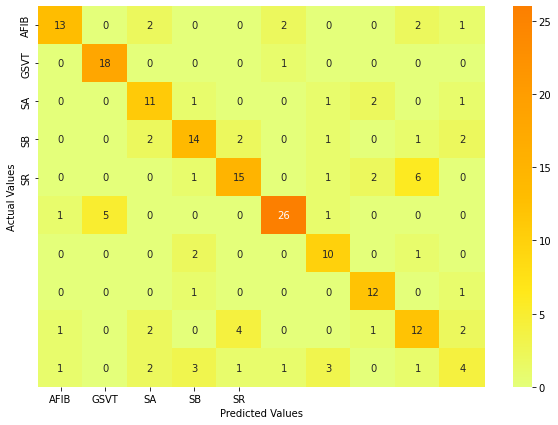

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,cmap="Wistia",xticklabels=['AFIB','GSVT','SA','SB','SR'],yticklabels=['AFIB','GSVT','SA','SB','SR'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')